# Customer Churn Analysis

## Project Overview

SyriaTel, a leading telecommunications company, faces a critical challenge in retaining its customers, as high churn rates threaten its revenue and market position. The objective of this project is to develop a machine learning model to predict customer churn by analyzing historical data, including customer demographics, service usage, customer interactions, billing information, and past churn records. By identifying patterns and factors that contribute to churn, the model will enable SyriaTel to implement targeted retention strategies such as personalized offers, loyalty programs, and enhanced customer support. This project involves data collection, preparation, exploratory data analysis, model building and evaluation, and deployment. Continuous monitoring and updating of the model will ensure its effectiveness over time, helping SyriaTel to proactively engage at-risk customers and improve overall customer retention

## Business Problem

SyriaTel, a leading telecommunications company, is struggling with customer retention, which is a critical issue for maintaining their revenue and market share. Customer churn, the phenomenon where customers discontinue their services, is a significant threat to their business. High churn rates can lead to substantial revenue loss and increased costs associated with acquiring new customers.

To address this challenge, it is essential for SyriaTel to understand the underlying reasons why customers are leaving and identify which customers are most likely to churn. By analyzing customer data, including behavior, usage patterns, and demographic information, SyriaTel can develop predictive models to forecast churn. These insights will enable the company to implement targeted interventions aimed at retaining at-risk customers, enhancing customer satisfaction, and ultimately reducing churn rates. This proactive approach is vital for sustaining revenue growth and securing a competitive edge in the telecommunications market.

## Data Understanding

This customer churn dataset is designed to predict which customers are likely to leave the company. It contains various features that describe customer demographics,account information, service usage patterns, and their churn status  . The dataset is sourced from a Kaggle competition aimed at developing predictive models for customer churn.

**Here's a summary of the columns:**
- state: The state of the customer.
  
- account length: The length of the account in days or months.

- area code: The area code of the customer's phone number.
- phone number: The phone number of the customer.
- international plan: Whether the customer has an international plan or not.
- voice mail plan: Whether the customer has a voicemail plan or not.
- number vmail messages: The number of voicemail messages the customer has.
- total day minutes: Total minutes of day calls.
- total day calls: Total number of day calls.
- total day charge: Total charge for the day calls.
- total eve minutes: Total minutes of evening calls.
- total eve calls: Total number of evening calls.
- total eve charge: Total charge for the evening calls.
- total night minutes: Total minutes of night calls.
- total night calls: Total number of night calls.
- total night charge: Total charge for the night calls.
- total intl minutes: Total minutes of international calls.
- total intl calls: Total number of international calls.
- total intl charge: Total charge for the international calls.
- customer service calls: Number of times the customer called customer service.
- churn: Whether the customer churned or not (True/False).

#### Importing Libraries

In [1]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV #splitting the dataset into test-train
from imblearn.over_sampling import SMOTE #SMOTE technique to deal with unbalanced data problem
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report # performance metrics
from sklearn.preprocessing import StandardScaler # to scale the numeric features
# Feature Selection, XAI, Feature Importance
from sklearn.inspection import permutation_importance

  
 
from sklearn.feature_selection import SelectFromModel

# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


#### Loading The Data

In [2]:
# Import the class 
from customer_churn_analysis import CustomerChurnDataset

In [3]:
# Read my dataset
# Instantiate the class with the file name
df = CustomerChurnDataset('Customer_Churn.csv')

In [4]:
df

In [5]:
df.df_info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       33

> The range index, indicating the number of rows in the DataFrame from 0 to 3332.
>-  total number of columns 21 columns.
>- For each column, it provides:
>- The column name (Column)
>- The non-null count of values (Non-Null Count)
>- The dataset has no null value

In [6]:
summary_result = df.statistical_summary()
summary_result

Statistical Summary of the Dataset:
       account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std

> The above is the statistical summary of each column in terms of the count of the rows in the dataset, the mean value, the standard deviation, the median , the 25th percentile and the 75th percentile and the maximum results of each column


In [7]:
# The coumns of the dataset
df.get_columns()

Columns of the Dataset:
Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


In [8]:
# Getting the datatype of each column
df.get_dtypes()

Data Types of Columns:
state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [9]:
#  The shape of the dataset
df.df_shape()

Shape of the Dataset:
(3333, 21)


>The dataset has a shape of 3333 rows and 21 columns

## Data Preparation

### Data Cleaning

The processes that I will follow during data cleaning process

> - Checking for null values
> - Checking for duplicates
> - Changing datatypes of columns and Binary Encoding
> - Checking for outliers

In [10]:
df = pd.read_csv('Customer_Churn.csv')


#### 1.1 Checking for null values

In [11]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

>The dataset looks fairly clean already (no non-null items). But there are object datatypes that I will like to handle them in a different way that is converting them to 0s and 1s, The process is calles called binary encoding

#### 1.2 Checking for duplicates

In [12]:
df.duplicated().sum()


0

> The dataset has no null values

> The datatypes of `international plan`, `voice mail plan`, `churn` has been converted to Numerical datatypes

#### Unique values of each column

In [13]:
# Checking number of unique values in each column
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
state,51
account length,212
area code,3
phone number,3333
international plan,2
voice mail plan,2
number vmail messages,46
total day minutes,1667
total day calls,119
total day charge,1667


In [14]:
# Value Counts  of Customer Service Calls
df['customer service calls'].value_counts()

customer service calls
1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: count, dtype: int64

#### Drop Columns

>In the dataset, there are several columns that are not useful for making predictions. Specifically, the `phone number` column contains unique IDs assigned to customers, which do not contribute any predictive value and should be removed. Additionally, the `State` column, which has 51 unique values, can lead to high dimensionality issues if encoded for modeling purposes. The `account length`column is also unlikely to be useful for predictions. Therefore, I will drop the `phone number`, `State`, and `account length` columns from the dataset to streamline it for analysis and modelling.



In [15]:
df.drop(columns = ['phone number','state','account length'],axis = 1, inplace = True)

#### Checking for outliers

To enhance the data analysis process, I am going to visualize outliers in the dataset using boxplots

In [16]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

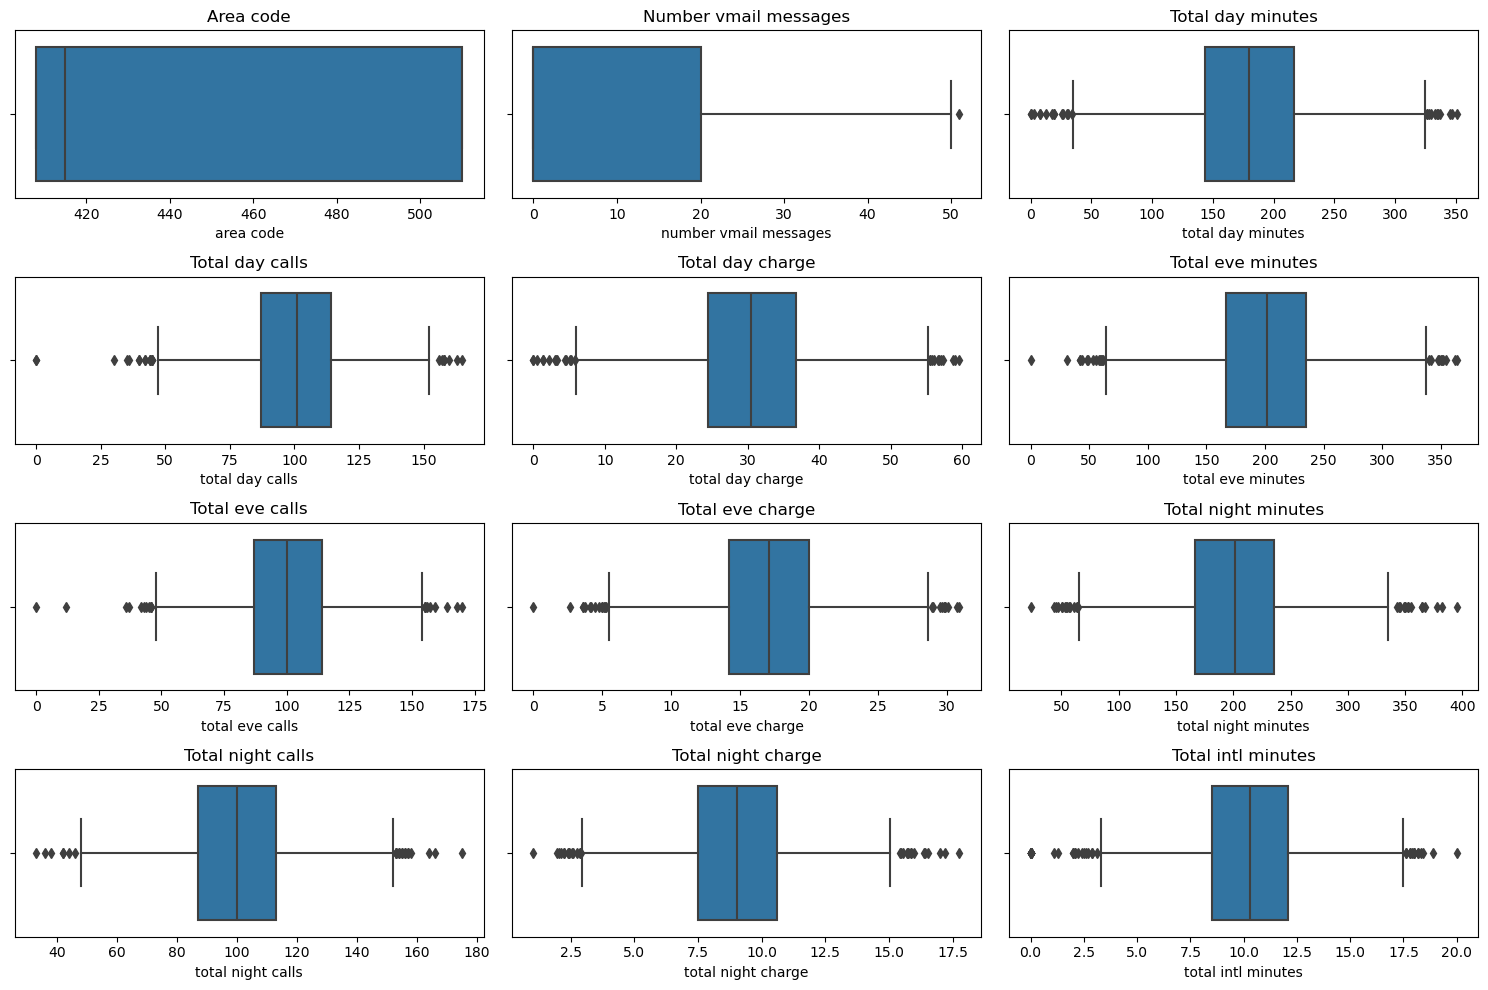

In [17]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    if i <= 12:  # Limit to 12 subplots
        plt.subplot(4, 3, i)
        sns.boxplot(x=df[column])
        plt.title(f'{column.capitalize()}')
        plt.xlabel(column)

plt.tight_layout()
plt.show()


>Examining the boxplots reveals the presence of outliers. However, it's essential not to remove them hastily. I need to carefully investigate these outliers to understand their impact on the dataset.

In [18]:
df.describe()

,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Examining the boxplots reveals several outliers across different variables, indicating potential data anomalies or extreme usage patterns. However, it's crucial not to remove these outliers blindly. Let's carefully investigate each variable to understand its context and impact on the dataset.

>- Account Length: The maximum value of 243 seems plausible, as it represents the number of days a customer has been with the service provider. 
International Plan and Voice Mail Plan: These variables seem to be binary (0 or 1), and the minimum and maximum values of 0 and 1 are expected and realistic.

>- Number of Voice Mail Messages: The maximum value of 51 seems plausible, as some customers may receive a large number of voice mail messages. However, without additional context, it's difficult to assess its realism.

>- Total Day, Evening, and Night Minutes: The maximum values for these variables (350.8, 363.7, and 395.0, respectively) are within the plausible range for minutes of usage, especially for heavy users or during exceptional circumstances. However, it's essential to verify if these values align with typical usage patterns in the dataset.

>- Total Day, Evening, and Night Calls: The maximum values of 165, 170, and 175, respectively, seem high but could be realistic during peak usage times or for customers with specific needs. Again, it's important to validate these values based on the context of the data.

>- Total Day, Evening, and Night Charge: The maximum values for charges seem reasonable given the corresponding maximum minutes of usage.

>- Total International Minutes, Calls, and Charges: The maximum values appear plausible but may require further validation based on international calling patterns and associated charges.

>- Customer Service Calls: The maximum value of 9 for the number of customer service calls is relatively high but could occur for customers experiencing multiple issues or requiring extensive support. However, it's essential to verify if such occurrences are common in the dataset.

Upon detailed outlier examination, I've chosen not to remove them outright. Rather, outliers in call-related columns (Total Day, Evening, and Night Calls) exceeding their maximum values will be trimmed as unusual. High charges, possibly due to call volume, will be retained.

#### A function To remove Outliers

In [19]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to numeric columns
# numeric_columns = df.select_dtypes(include=np.number).columns
numeric_columns = df[['total day calls','total eve calls','total night calls','total intl calls']]
for column in numeric_columns:
    df = remove_outliers_iqr(df,column)
df

,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


#### Boxplots After REmoval Of outliers

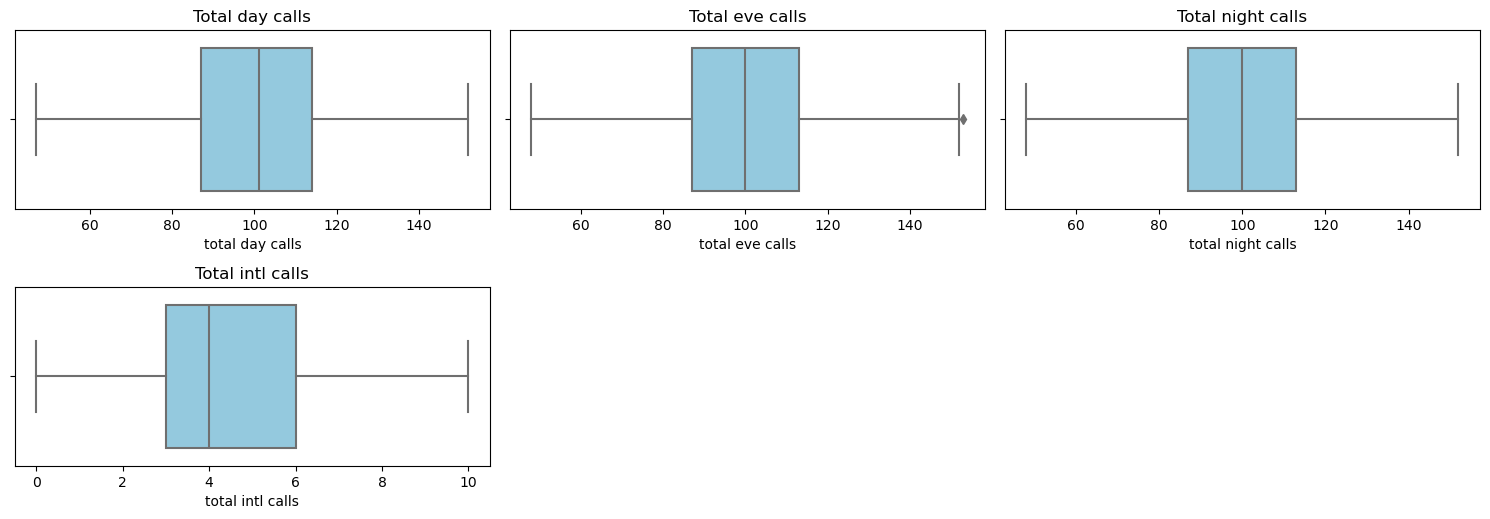

In [20]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    if i <= 12:  # Limit to 12 subplots
        plt.subplot(4, 3, i)
        sns.boxplot(x=df[column],color = 'skyblue')
        plt.title(f'{column.capitalize()}')
        plt.xlabel(column)

plt.tight_layout()
plt.show()

### Explanatory Data Analysis

#### Univariate Data Analysis

##### Histograms

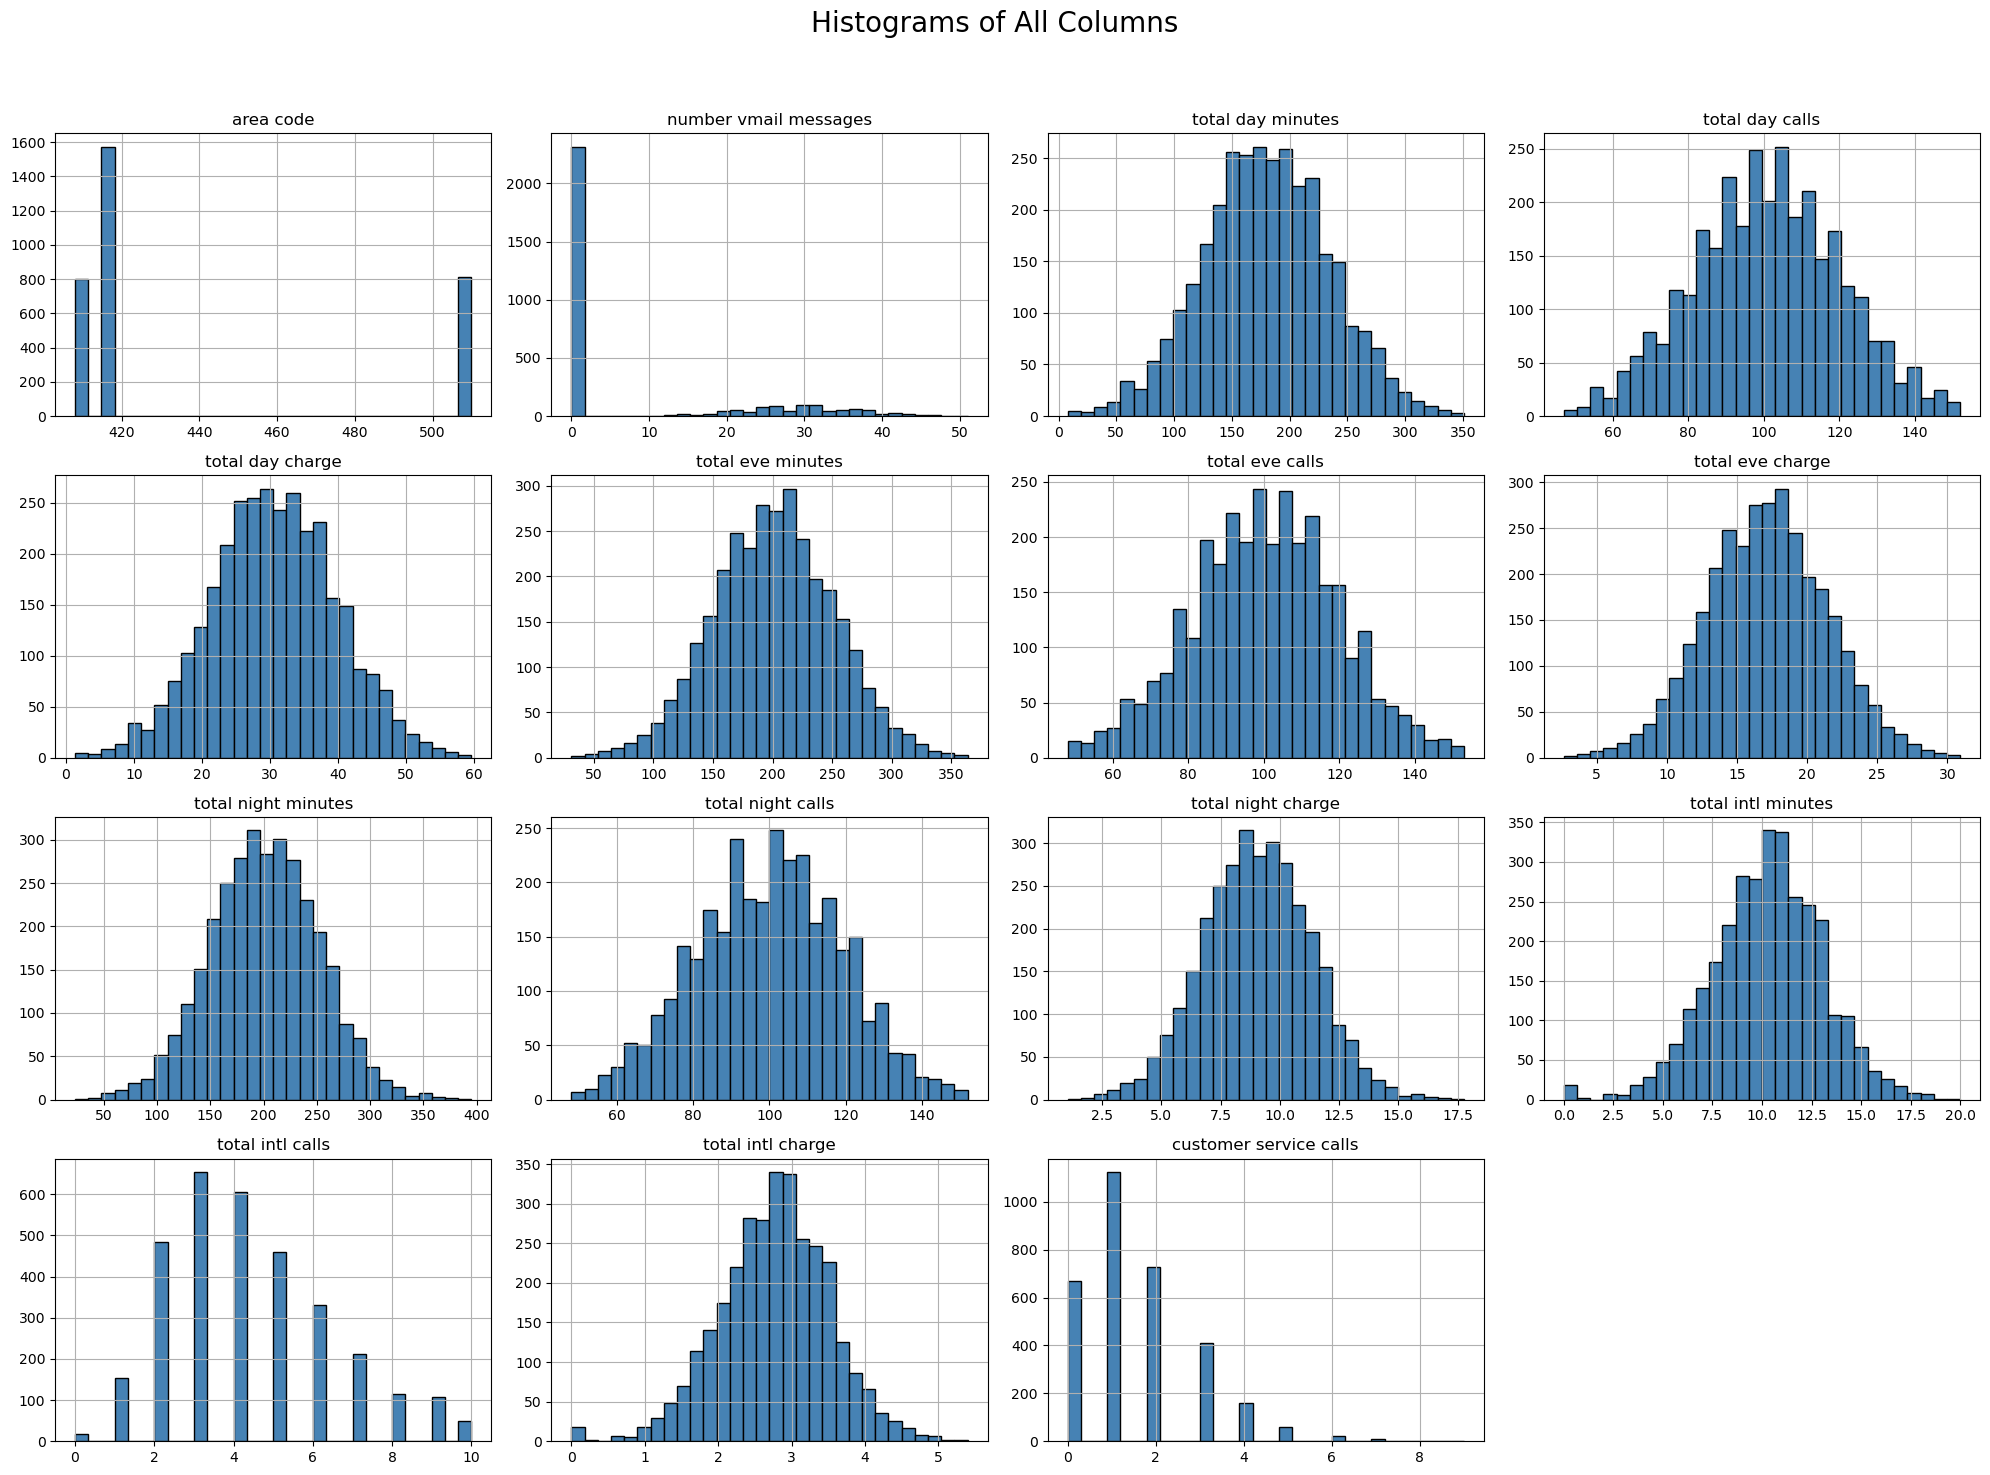

In [21]:
# Create histograms for each column
df.hist(figsize=(20, 15), bins=30, edgecolor='black', color='steelblue')
plt.suptitle('Histograms of All Columns', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


>`number of vmail messages`,`total day minutes`,`total day calls`, `total day charge`,`total eve minutes`,`total eve calls`,`total eve charge`,`total night minutes`, `total night calls`, `total night charge`,`total intl minutes`,`total intl charge` columns have a normal distribution their histograms have a bell-shaped curve, with most data points clustering around the mean and fewer data points as you move away from the mean.

>Histograms for `international plan` and `voice mail plan` shows two distinct bars representing the values 0 and 1. The distribution confirms that these variables are binary as expected, with both categories represented in the dataset.

>`Customer service calls` has a few peaks, which indicates there are a few modes in the population. This makes sense because `customer service calls` has to be a integer and not a float number.The histogram displays four bars: 642 customers made no calls, 1067 made one, 705 made two, and 400 made three. It illustrates varying levels of customer service interaction.

#### Checking Skewness

In [22]:
numeric_columns = df[['number vmail messages','total day minutes','total day calls', 'total day charge','total eve minutes','total eve calls','total eve charge','total night minutes', 'total night calls', 'total night charge','total intl minutes','total intl charge']]

In [23]:
# Assuming df is your DataFrame
skewness = numeric_columns.skew()

print("Skewness of the dataset:")
print(skewness)


Skewness of the dataset:
number vmail messages    1.282223
total day minutes       -0.003458
total day calls         -0.007260
total day charge        -0.003458
total eve minutes        0.002588
total eve calls         -0.021194
total eve charge         0.002614
total night minutes      0.013346
total night calls       -0.016208
total night charge       0.013299
total intl minutes      -0.251837
total intl charge       -0.251995
dtype: float64


Most variables exhibit little to no skewness, indicating relatively symmetric distributions, except for the number of `voice mail messages` and `total international minutes` and `charges`, which show moderate skewness towards higher and lower values, respectively

#### Churn Distribution

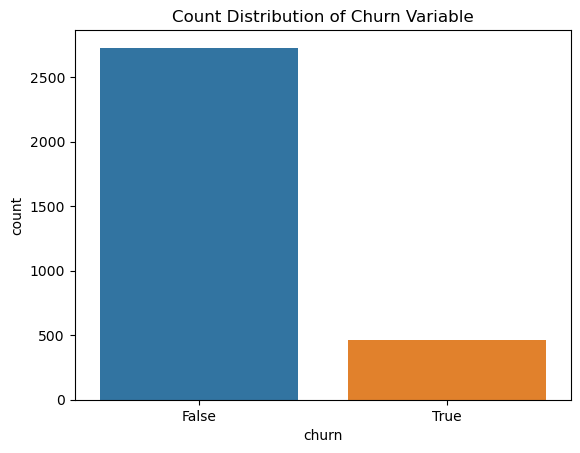

In [24]:
# Plotting the Distribution of the Species Variable
ax = sns.countplot(data = df, x='churn')
ax.set_title('Count Distribution of Churn Variable');

churn
False    2727
True      462
Name: count, dtype: int64


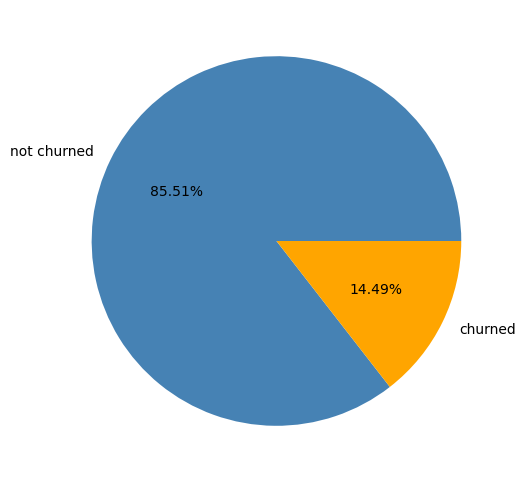

In [25]:
##Visualize the count of Churn
print(df['churn'].value_counts())
labels='not churned','churned'
fig, ax = plt.subplots(figsize=(6,6))
colors=["steelblue","orange"]
ax.pie(df['churn'].value_counts(), labels=labels, autopct='%1.2f%%',colors=colors)
plt.show()

The above plots shows class imbalance with customers who have not churned at 85.51% and those who have churned at 14.49%.This imbalance could impact the performance of machine learning models, as they may tend to favor the majority class and struggle to accurately predict the minority class. Strategies such as resampling techniques (oversampling of the minority class or undersampling of the majority class), using appropriate evaluation metrics (such as precision, recall, and F1-score), or employing ensemble methods can help mitigate the effects of class imbalance and improve model performance.








#### Bivariate analysis

##### Boxplots

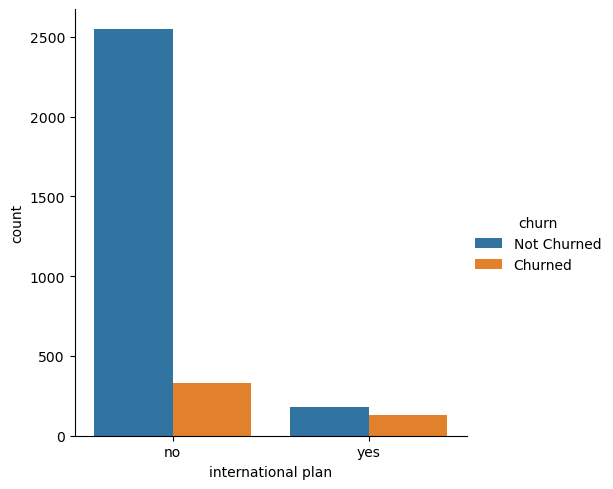

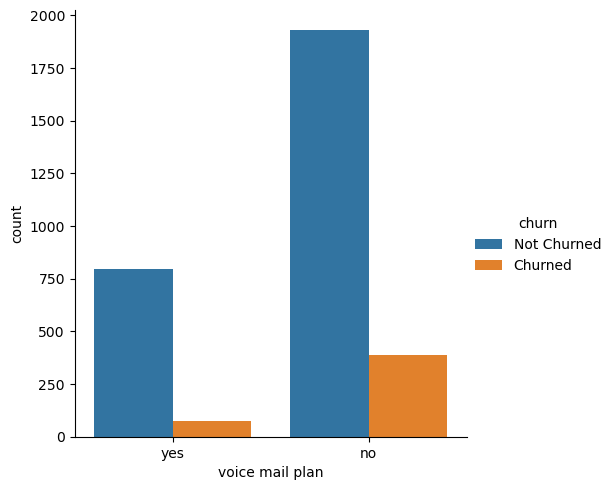

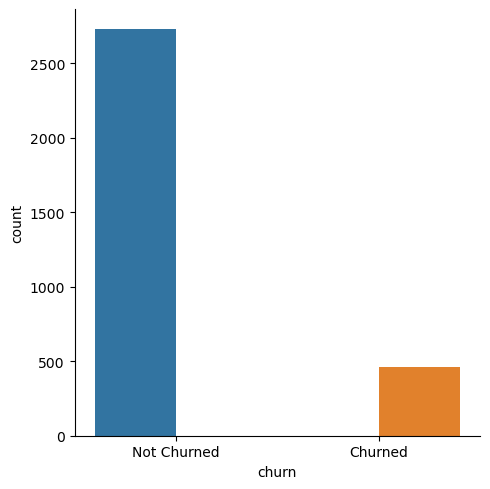

In [45]:
# Convert boolean values to categorical labels
df['churn'] = df['churn'].map({True: 'Churned', False: 'Not Churned'})

# Plot countplots for each non-numeric column
for col in df.select_dtypes(exclude=np.number):
    sns.catplot(x=col, kind='count', hue='churn', data=df)



- For the first countplot Customers with no international plan churn more than customers with an international plan even though it seems some customers 
  with an international plan still churn away from the company
- For the second countplot Customers with no voice mail  plan churn more than customers with a voice mail plan

In [71]:
# Create numeric & categorical lists
numeric_cols = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
                'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']
categoric_cols = ['state','area code','international plan','voice mail plan']

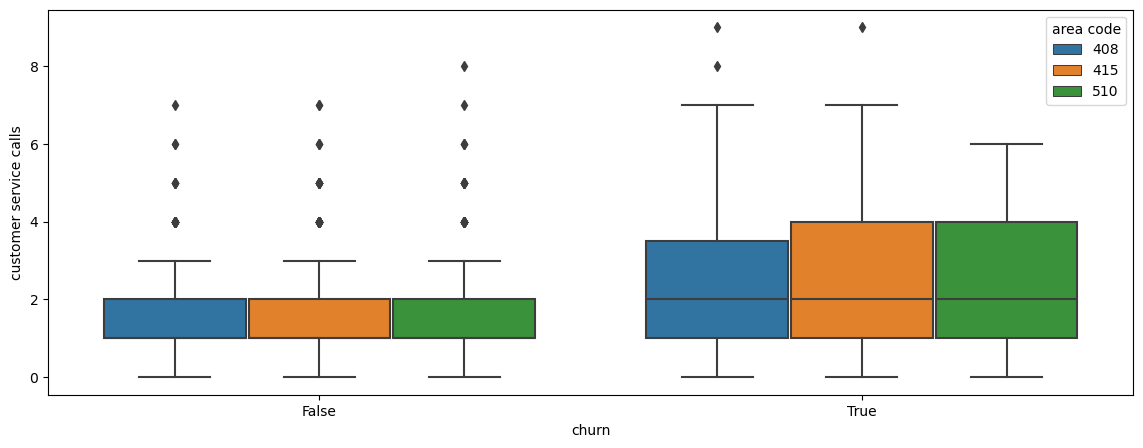

In [28]:
# Boxplot to see which area code has the highest churn
plt.figure(figsize=(14,5))
sns.boxplot(data=df,x='churn',y='customer service calls',hue='area code');
# plt.legend(loc='upper right');

There are outliers, in all area codes, amongst the customers who have not terminated their accounts.
Of the customers who have terminated their account, they more likely have a 415 or a 510 area code.

#### Checking for correlation

[Text(0.5, 1.0, 'correlation matrix of numeric features')]

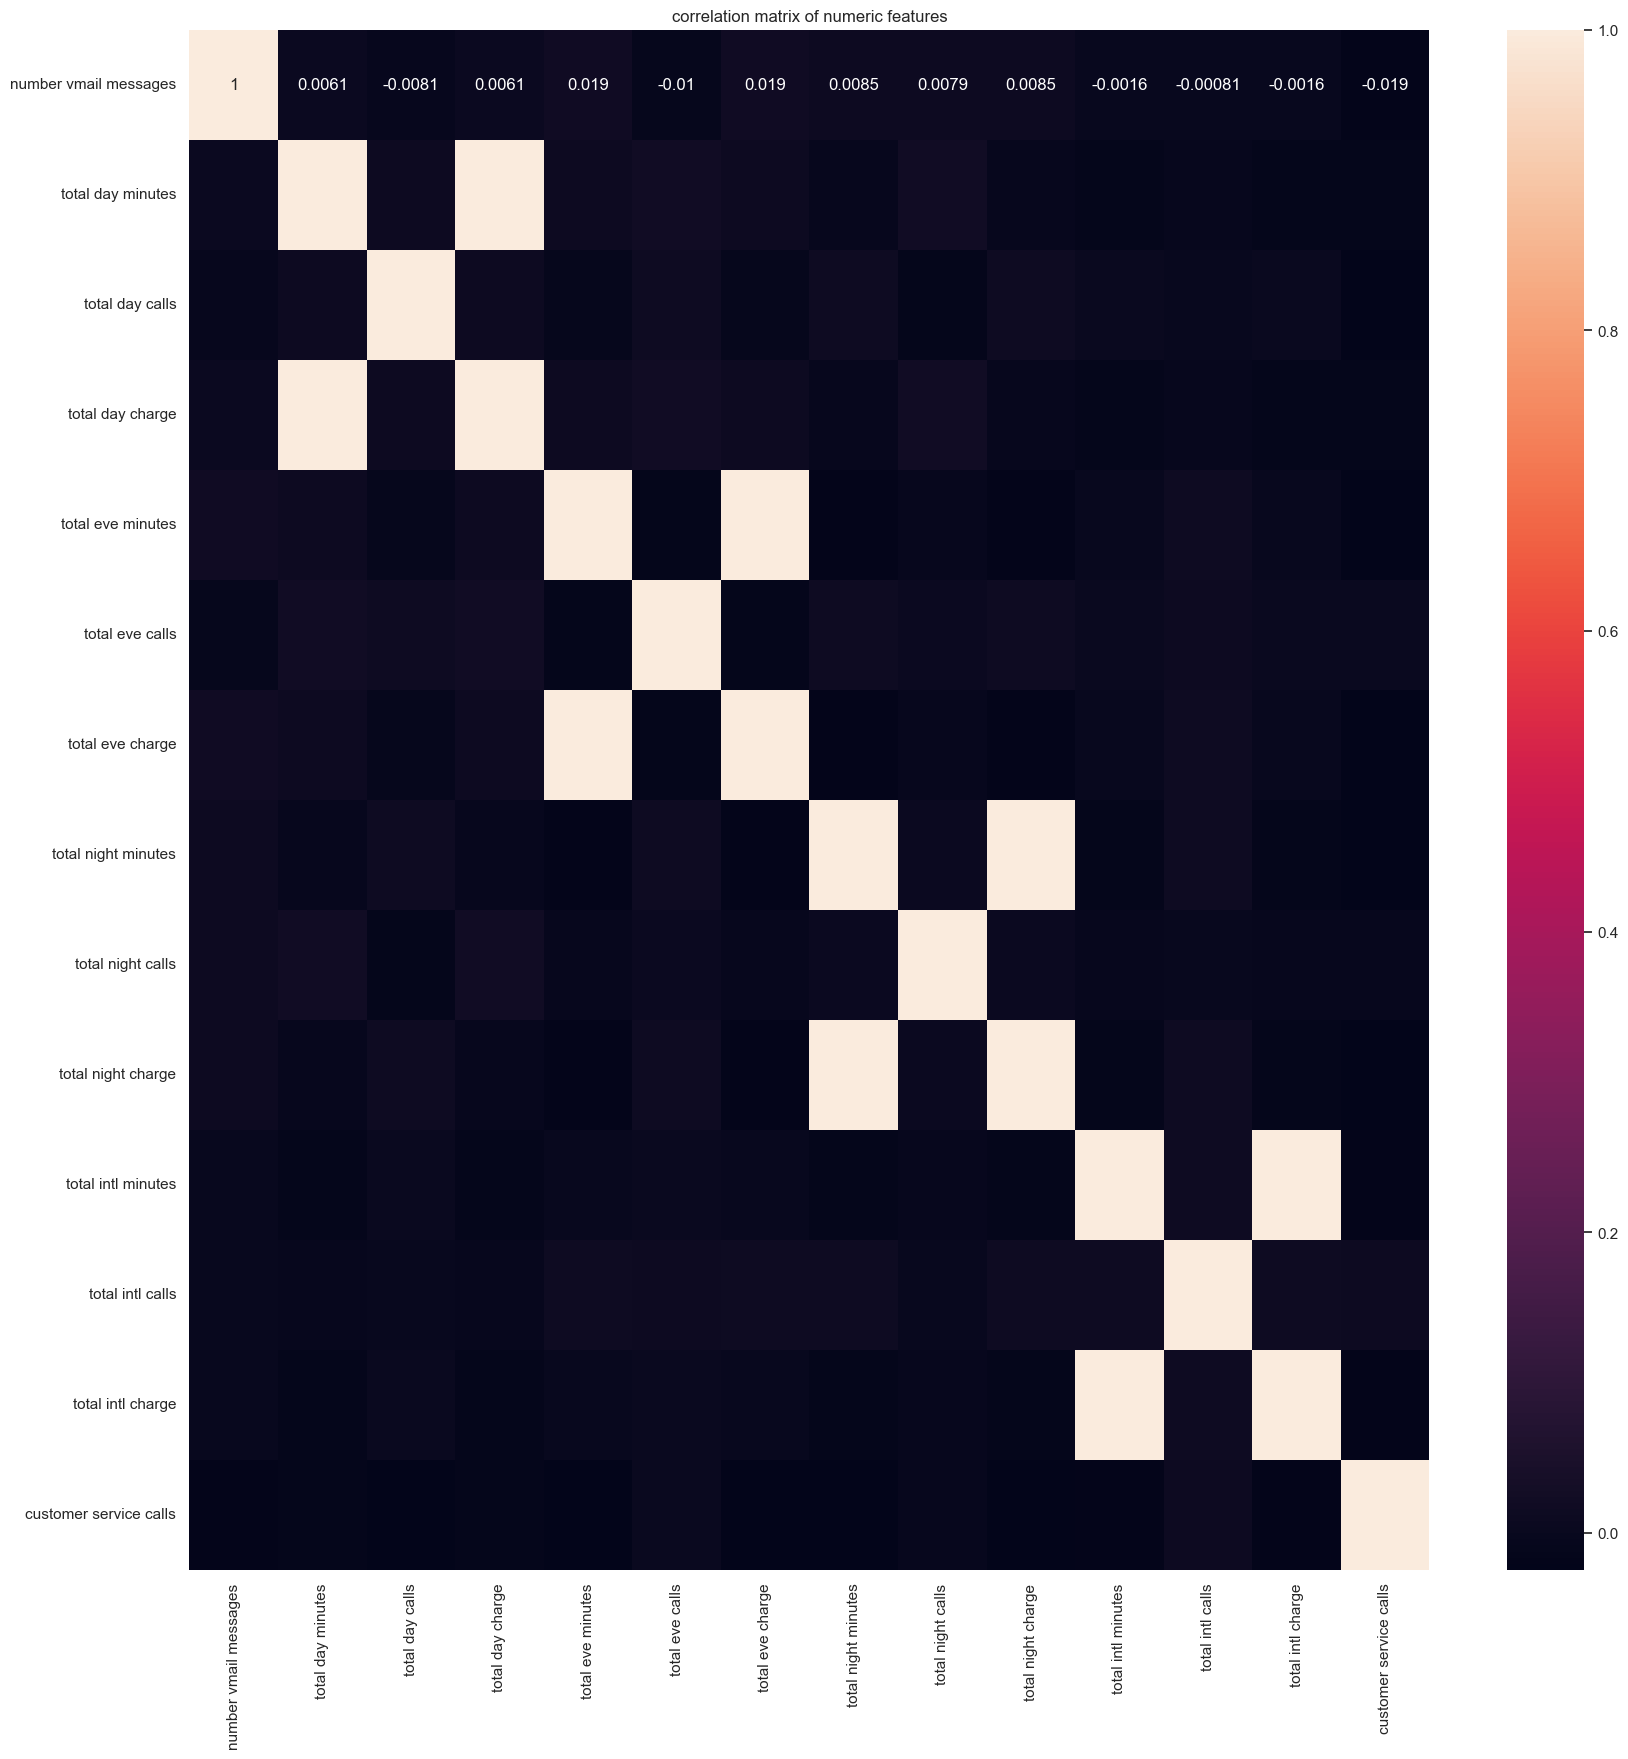

In [29]:
num = ['number vmail messages','total day minutes', 'total day calls', 
       'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge','total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls'] # numeric features
cr = df[num].corr(method='spearman') # calculate correlation matrice

plt.figure(figsize=(20,20))
sns.set(font_scale=1)
sns.heatmap(cr, annot=True).set(title='correlation matrix of numeric features')

In [34]:
# Create numeric & categorical lists
numeric_cols = ['number vmail messages','total day minutes','total day calls','total day charge',
                'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']
categoric_cols = ['state','area code','international plan','voice mail plan']

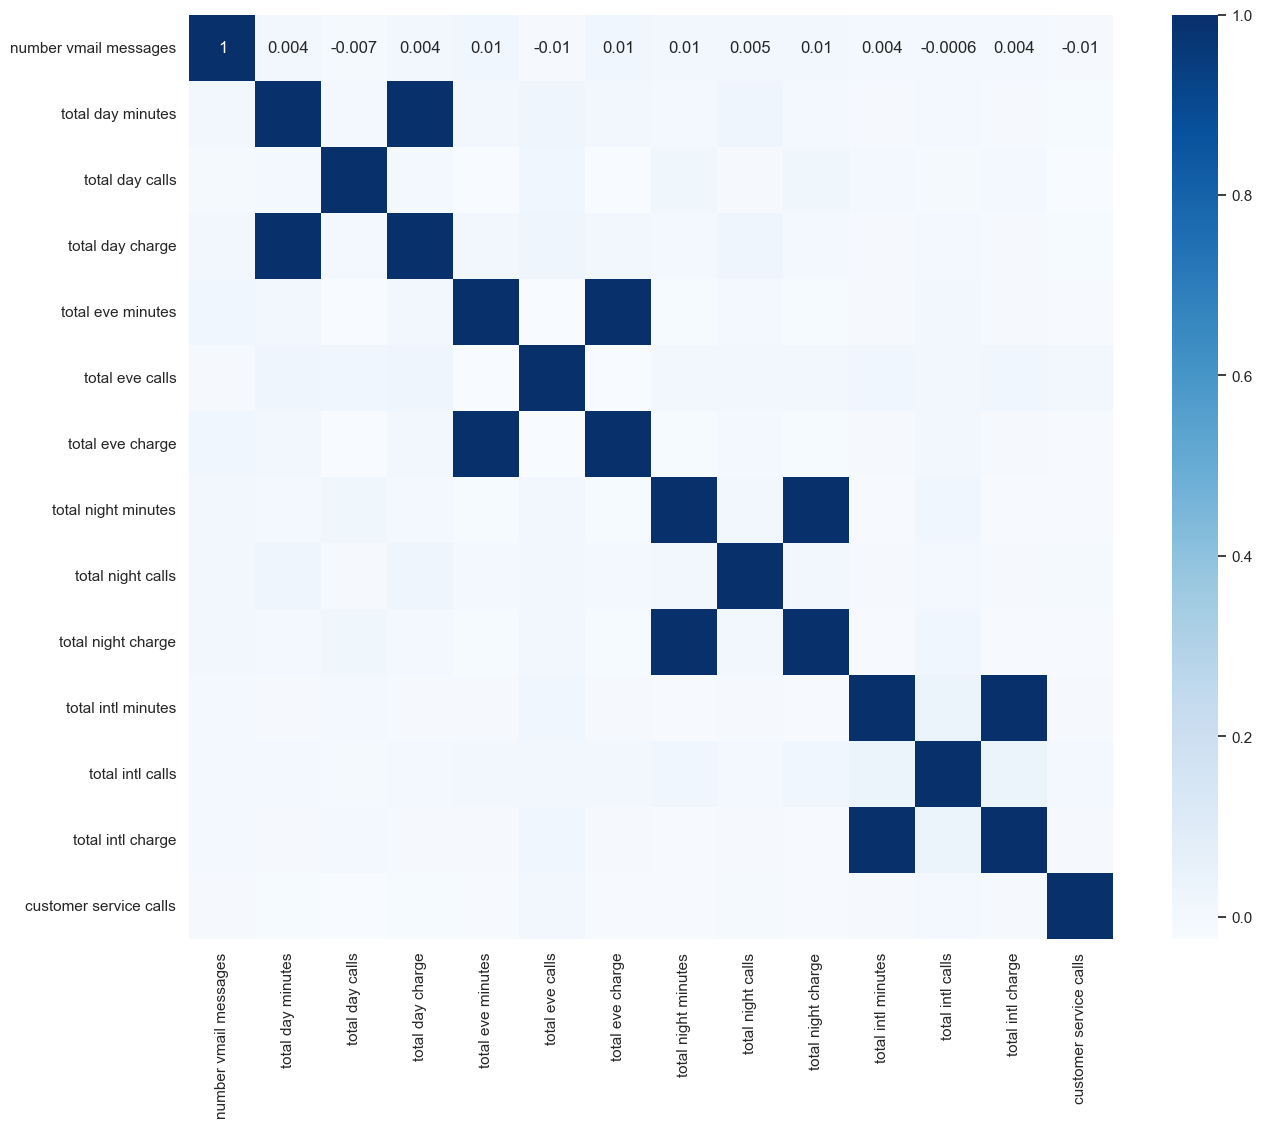

In [35]:
corr_mat = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.subplots(figsize=(15,12))
sns.heatmap(corr_mat, annot=True, cmap='Blues', square=True,fmt='.0g');
plt.xticks(rotation=90);
plt.yticks(rotation=0);

Most of the features are not correlated however some do share a perfect correlation.
Total day charge and total day minutes features are fully positively correlated.
Total eve charge and total eve minutes features are fully positively correlated.
Total night charge and total night minutes features are fully positively correlated.
Total int charge and total int minutes features are fully positively correlated.
It makes sense for these features to be perfectly correlated because the charge is a direct result of the minutes used.
The perfect correlation of 1 indicates the presence of perfect multicollinearity. It does not have the same impact on nonlinear models as it does on linear models. Some nonlinear models are impacted by perfect multicollinearity whereas others are not.

In [77]:
df['total calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls'] + df['total intl calls'] + df['customer service calls']
df['total minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes'] + df['total intl minutes']

print(df['total calls'].describe(), df['total minutes'].describe(), sep='\n\n')

count    2814.000000
mean      306.280028
std        33.437099
min       194.000000
25%       284.000000
50%       307.000000
75%       329.000000
max       410.000000
Name: total calls, dtype: float64

count    2814.000000
mean      592.718870
std        86.811194
min       284.300000
25%       533.975000
50%       593.800000
75%       652.200000
max       882.200000
Name: total minutes, dtype: float64


In [78]:
calls_by_state = df.groupby('state')['total calls'].sum().sort_values(ascending=False)
minutes_by_state = df.groupby('state')['total minutes'].sum().sort_values(ascending=False)

avg_minutes_by_state = df.groupby('state')['total minutes'].mean().sort_values(ascending=False)
avg_calls_by_state = df.groupby('state')['total calls'].mean().sort_values(ascending=False)
records_by_state = df.groupby('state')['churn'].count().sort_values(ascending=False)

print(avg_minutes_by_state.head())
print(avg_calls_by_state.head())
print(records_by_state.head())

KeyError: 'state'

In [ ]:
df.columns

In [ ]:
def correlation(df,column=None,rank=None):
    '''
    performs correlation matrix, drops non numeric object types
    variables are dataframe, column, and ranking
    ranking is optional
    column = 'column'
    rank = True for # rank 1,2,3...
    
    '''
    # Redundant check. Makes sure all columns of object type are dropped
    df_object = df.select_dtypes(include='object')
    print(f'The following columns were dropped due to being object types:\n{df_object.columns.tolist()}')
    df = df.drop(df_object,axis=1) 
    df1 = df
    if rank is True:
        try:
            df_corr = df1.corr()[column]
            df_corr = df_corr.drop(column)
            print(f'Ranked correlation to {column}')
            return(df_corr.rank(ascending=False).sort_values())
        except:
            df_corr = df1.corr()
            return(df_corr.rank(ascending=False))
    else:    
        try:
            df_corr = df.corr()[column]
            df_corr = df_corr.drop(column)
            print(f'Correlation to {column}')
            return(df_corr.sort_values(ascending=False))
        except:
            df_corr = df1.corr()
            return(df_corr)
# Getting the correlation between variables
df_corr = abs(correlation(df))
fig, ax = plt.subplots(figsize=(8,15))
sns.heatmap(df_corr[['churn']].sort_values(by='churn',ascending=False),annot = True)

ax.set_title('Variables Correlating with Churn');
# plt.savefig('Group_plots/correlation_plot.png', dpi=100)


In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
numeric_columns.corr()

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Comparison between Total International Minutes and Total International Charge')
sns.barplot(x="customer service calls", y="total intl charge", data=df, hue="churn", palette="bright")
plt.xlabel("Total International Minutes")
plt.ylabel("Total International Charge")
plt.legend(title='Churn')
plt.show()



In [76]:
# Change churn to values: 1 (churned/True) 0 (no churn/False)
df['churn'] = df['churn'].astype(int)

# Handle object types for international plan and voice mail plan

df.loc[df['international plan'] == 'no', 'international plan'] = 0
df.loc[df['international plan'] == 'yes', 'international plan'] = 1 

df.loc[df['voice mail plan'] == 'no', 'voice mail plan'] = 0
df.loc[df['voice mail plan']== 'yes', 'voice mail plan'] = 1

### modelling

Train_test_split

In [53]:
# Assignig churn to `y` as the target variable and all the other features to `X` as the indepenent variables
y = df['churn']
X = df.drop(columns ='churn',axis = 1)

In [54]:
from sklearn.model_selection import train_test_split
# Splitting the data into X_train,X_test,y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [55]:
print('X_train_shape',X_train.shape)
print('=' * 24)
print('X_test_shape',X_test.shape)
print('=' * 24)
print('y_train_shape',y_train.shape)
print('=' * 24)
print('y_test_shape',y_test.shape)
print('=' * 24)

X_train_shape (2251, 17)
X_test_shape (563, 17)
y_train_shape (2251,)
y_test_shape (563,)


Preprocessing

In [ ]:
dummy_df_area_code = pd.get_dummies(reduced_df["area code"],dtype=np.int64,prefix="area_code_is")
dummy_df_international_plan = pd.get_dummies(reduced_df["international plan"],dtype=np.int64,prefix="international_plan_is",drop_first = True)
dummy_df_voice_mail_plan = pd.get_dummies(reduced_df["voice mail plan"],dtype=np.int64,prefix="voice_mail_plan_is",drop_first = True)


reduced_df = pd.concat([reduced_df,dummy_df_state,dummy_df_area_code,dummy_df_international_plan,dummy_df_voice_mail_plan],axis=1)
reduced_df = reduced_df.loc[:,~reduced_df.columns.duplicated()]
reduced_df = reduced_df.drop(['state','area code','international plan','voice mail plan'],axis=1)

reduced_df.head()

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load the dataset
# Assuming your dataset is loaded into a DataFrame called 'df'

# Step 1: Split the dataset into training and testing sets
X = df.drop('churn', axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Perform encoding and standardization on training data

# One-hot encode the "area code" column
X_train_encoded = pd.get_dummies(X_train, columns=['area code'], drop_first=True)

# Perform Label Encoding for binary columns ("international plan" and "voice mail plan")
binary_cols = ['international plan', 'voice mail plan']
for col in binary_cols:
    X_train_encoded[col] = pd.get_dummies(X_train_encoded[col], drop_first=True)

# Initialize StandardScaler for numerical features
scaler = StandardScaler()

# Standardize numerical features
numeric_features = X_train_encoded.select_dtypes(include=['float64', 'int64']).columns
X_train_encoded[numeric_features] = scaler.fit_transform(X_train_encoded[numeric_features])

# Combine encoded and standardized features with target variable for training data
train_df = pd.concat([X_train_encoded, y_train], axis=1)

# Step 3: Perform encoding and standardization on testing data

# One-hot encode the "area code" column for testing data
X_test_encoded = pd.get_dummies(X_test, columns=['area code'], drop_first=True)

# Perform Label Encoding for binary columns ("international plan" and "voice mail plan") for testing data
for col in binary_cols:
    X_test_encoded[col] = pd.get_dummies(X_test_encoded[col], drop_first=True)

# Standardize numerical features for testing data
X_test_encoded[numeric_features] = scaler.transform(X_test_encoded[numeric_features])

# Combine encoded and standardized features with target variable for testing data
test_df = pd.concat([X_test_encoded, y_test], axis=1)

# Now, train_df and test_df contain the combined datasets for training and testing


Scaling is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variable variance is 1, or scaling the variable so the variable values range from 0 to 1.
In our example, Min-Max Normalization method is applied. MinMaxScaler is used to reduce the effects of outliers in the dataset. By applying the following method, standard deviation issues will be solved.
MinMaxScaler is applied on the columns which is defined in "columns_to_be_scaled" variable below.

In [ ]:
transformer = MinMaxScaler()

def scaling(columns):
    return transformer.fit_transform(reduced_df[columns].values.reshape(-1,1))

for i in reduced_df.select_dtypes(include=[np.number]).columns:
    reduced_df[i] = scaling(i)
reduced_df.head()

In [ ]:
train_df

Binary Encoding

In [56]:
X_train.columns

Index(['area code', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls'],
      dtype='object')

In [65]:
numerical_features = X_train.iloc[:, 1:]  # Accessing all rows, all columns starting from the second column onwards
numeric_columns = numerical_features.select_dtypes(include=['int64', 'float64'])


In [66]:
test_numerical_features = X_test.iloc[:, 1:]  # Accessing all rows, all columns starting from the second column onwards
test_numerical_features
test_numeric_columns =test_numerical_features.select_dtypes(include=['int64', 'float64'])

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(numeric_columns)
X_test_scaled = scaler.transform(test_numeric_columns )
# # Optionally, you can convert the scaled features back to a DataFrame
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test= pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display the first few rows of the scaled training DataFrame
print(X_train.head())
# # Display the first few rows of the scaled testing DataFrame
print(X_test.head())

ValueError: Shape of passed values is (2251, 14), indices imply (2251, 16)

In [ ]:
cat_features = 

In [60]:
numerical_features =  df.iloc[2:,:]
# X_train_enc = X_train['area code']
numerical_features

,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
2,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
4,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
7,415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
9,415,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [44]:
X_train_features = X_train.select_dtypes(include=['float64', 'int64']).columns
X_test_features = X_test.select_dtypes(include=['float64', 'int64']).columns

NameError: name 'X_train' is not defined

In [57]:
# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train_features)
X_test_scaled = scaler.transform(X_test_features)
# # Optionally, you can convert the scaled features back to a DataFrame
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test= pd.DataFrame(X_test_scaled, columns=X_test.columns)


ValueError: could not convert string to float: 'area code'

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
# Assuming your dataset is loaded into a DataFrame called 'df'

# Step 1: Split the dataset
X = df.drop('churn', axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define preprocessing steps
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = ['area code']

# Define a custom transformer to retain column names
class NameAwareOneHotEncoder(OneHotEncoder):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.column_names = None

    def fit(self, X, y=None):
        self.column_names = X.columns
        return super().fit(X, y)

    def transform(self, X):
        transformed = super().transform(X)
        return pd.DataFrame(transformed, columns=self.get_feature_names_out(self.column_names))

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', NameAwareOneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 3: No need to encode 'state' since it has many unique values

# Step 4: Combine the two dataframes
# Perform preprocessing on X_train and X_test
X_train_processed = preprocessor.fit_transform(X_train)
X_train_processed = pd.DataFrame(X_train_processed, columns=list(numeric_features) + preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(['area_code']))

X_test_processed = preprocessor.transform(X_test)
X_test_processed = pd.DataFrame(X_test_processed, columns=list(numeric_features) + preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(['area_code']))

# Combine the processed X_train and X_test with y_train and y_test
train_df = pd.concat([X_train_processed, y_train.reset_index(drop=True)], axis=1)
test_df = pd.concat([X_test_processed, y_test.reset_index(drop=True)], axis=1)


RuntimeError: scikit-learn estimators should always specify their parameters in the signature of their __init__ (no varargs). <class '__main__.NameAwareOneHotEncoder'> with constructor (self, *args, **kwargs) doesn't  follow this convention.

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
# Assuming your dataset is loaded into a DataFrame called 'df'

# Step 1: Split the dataset into training and testing sets
X = df.drop('churn', axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Perform encoding and standardization on training data

# Drop the 'area code' column with code '415' and perform one-hot encoding for the remaining 'area code' categories
X_train_encoded = pd.get_dummies(X_train[X_train['area code'] != 415], columns=['area code'], drop_first=True)

# Map 'yes' to 1 and 'no' to 0 for binary columns
X_train_encoded['international plan'] = X_train_encoded['international plan'].map({'yes': 1, 'no': 0})
X_train_encoded['voice mail plan'] = X_train_encoded['voice mail plan'].map({'yes': 1, 'no': 0})

# Initialize StandardScaler for numerical features
scaler = StandardScaler()

# Standardize numerical features
numeric_features = X_train_encoded.select_dtypes(include=['float64', 'int64']).columns
X_train_encoded[numeric_features] = scaler.fit_transform(X_train_encoded[numeric_features])

# Combine encoded and standardized features with target variable for training data
train_df = pd.concat([X_train_encoded, y_train], axis=1)

# Step 3: Perform encoding and standardization on testing data

# Drop the 'area code' column with code '415' and perform one-hot encoding for the remaining 'area code' categories for testing data
X_test_encoded = pd.get_dummies(X_test[X_test['area code'] != 415], columns=['area code'], drop_first=True)

# Map 'yes' to 1 and 'no' to 0 for binary columns for testing data
X_test_encoded['international plan'] = X_test_encoded['international plan'].map({'yes': 1, 'no': 0})
X_test_encoded['voice mail plan'] = X_test_encoded['voice mail plan'].map({'yes': 1, 'no': 0})

# Standardize numerical features for testing data
X_test_encoded[numeric_features] = scaler.transform(X_test_encoded[numeric_features])

# Combine encoded and standardized features with target variable for testing data
test_df = pd.concat([X_test_encoded, y_test], axis=1)

# Now, train_df and test_df contain the combined datasets for training and testing


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [45]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Step 2: Define preprocessing steps
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = ['area code']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 3: No need to encode 'state' since it has many unique values

# Step 4: Combine the two dataframes
# Perform preprocessing on X_train and X_test
X_train_processed = pd.DataFrame(preprocessor.fit_transform(X_train))
X_test_processed = pd.DataFrame(preprocessor.transform(X_test))

# Combine the processed X_train and X_test with y_train and y_test
X_train = pd.concat([X_train_processed, y_train.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test_processed, y_test.reset_index(drop=True)], axis=1)

In [46]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,churn
0,-0.523050,-0.696942,-0.583426,0.587413,-1.395845,0.587018,-0.138881,-1.196652,-0.139773,0.150713,0.984108,0.151145,-0.598390,-0.156105,-0.593461,0.728653,1.0,0.0,0.0,0
1,-1.008882,-0.533241,1.851233,1.746692,-2.498813,1.746758,-0.024941,0.820730,-0.024876,0.015983,0.097940,0.017568,0.217095,-0.638433,0.212026,1.751879,0.0,1.0,0.0,0
2,0.371904,1.688406,-0.583426,-1.088586,0.494959,-1.088660,0.371815,-0.006914,0.372474,-0.440023,1.244746,-0.438438,0.178262,-1.120762,0.183259,0.728653,0.0,0.0,1.0,1
3,-0.523050,1.688406,1.039680,0.330007,0.757571,0.330171,-1.050402,0.458636,-1.049369,-0.512569,-1.309503,-0.512135,-0.404227,-1.603090,-0.406473,-1.317797,0.0,0.0,1.0,0
4,-0.292919,1.688406,-0.583426,2.379720,-0.292876,2.379343,1.199916,0.717274,1.200685,2.304305,-0.579718,2.302202,-1.957532,-0.638433,-1.959911,-0.294572,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,-0.165068,-0.533241,-0.583426,-1.355525,-1.133233,-1.355602,0.813333,2.682928,0.812910,1.060652,-0.423335,1.058550,0.022932,-0.638433,0.025038,1.751879,0.0,1.0,0.0,0
2233,0.602035,-0.533241,-0.583426,1.380604,-0.818099,1.381115,0.249737,-0.110369,0.250396,-0.307366,-1.518013,-0.309466,0.294760,0.808553,0.298328,1.751879,0.0,1.0,0.0,0
2234,-1.085593,-0.533241,2.589008,-0.691990,-0.240354,-0.691612,1.431866,-0.006914,1.432872,-0.156055,0.254323,-0.157465,-0.559558,-0.156105,-0.564693,-0.294572,0.0,1.0,0.0,0
2235,-0.702041,-0.533241,1.703678,0.291872,0.179825,0.292036,-0.527498,-0.834558,-0.527548,0.604646,0.514960,0.602545,0.450090,-0.638433,0.456549,-1.317797,0.0,1.0,0.0,0


In [ ]:
OneHotEncoding

In [40]:
df

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


Standardization

In [ ]:
# One-Hot Encoding for area code
one_hot_encoder = OneHotEncoder(sparse=False)
X_train_encoded = one_hot_encoder.fit_transform(X_train[['area code']])
area_code_encoded_df = pd.DataFrame(X_train_encoded, columns=one_hot_encoder.get_feature_names_out(['area code']))
X_train= pd.concat([X_train, area_code_encoded_df], axis=1)
X_train.drop('area code', axis=1, inplace=True)

print(X_train.head())

In [39]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler

scaler = StandardScaler()

# Scale every feature except the binary column - female
transformed_training_features = scaler.fit_transform(X_train.iloc[2:,:])
transformed_testing_features = scaler.transform(X_test.iloc[2:,:])

# Convert the scaled features into a DataFrame
X_train_transformed = pd.DataFrame(scaler.transform(X_train.iloc[2:,:]), 
                                   columns=X_train.columns[:-1], 
                                   index=X_train.index)
X_test_transformed = pd.DataFrame(scaler.transform(X_test.iloc[:,:-1]), 
                                  columns=X_train.columns[:-1], 
                                  index=X_test.index)

 

X_train_transformed

ValueError: could not convert string to float: 'KY'

### Model Validation

### Model Deployment

### Conclusion

### Recommendations